# Customer Churn Prediction

## Project Overview

Customer churn, or customer attrition, refers to the phenomenon where a customer ends their relationship with a company or service provider. In today’s highly competitive business environment, retaining existing customers is crucial for long-term success and profitability. Predicting customer churn enables organizations to take proactive measures to retain at-risk customers, thereby minimizing revenue loss and improving customer satisfaction.
Project Objective:
This project aims to build a machine learning model that predicts whether a customer will churn based on their demographic, account, and service-related data. By accurately identifying customers likely to leave, businesses can implement targeted retention strategies and enhance overall customer loyalty.

## Problem Statement
The goal of this project is to develop a classification model that predicts whether a customer will churn. By leveraging demographic data (such as gender, senior citizen status, and tenure) alongside information about the services customers use (including internet service, phone service, and online security), we aim to build a model that enables the company to identify customers at high risk of churning. Early identification of these customers will allow the business to implement targeted retention strategies and reduce overall customer attrition.


## Data loading


In [22]:
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1J2aMbLrRnk8g0Y5TSbz-en_7UxlI7xh0cLIZnIy4aew/export?format=csv&gid=1981156305'

df = pd.read_csv(url)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Explanation:
- We use pandas to load and inspect the dataset.
- `df.head()` shows the first 5 rows, helping us understand the structure and contents of the data.

## Exploratory Data Analysis (EDA)

In [23]:
# Get a summary of the dataset: data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
# Get summary statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


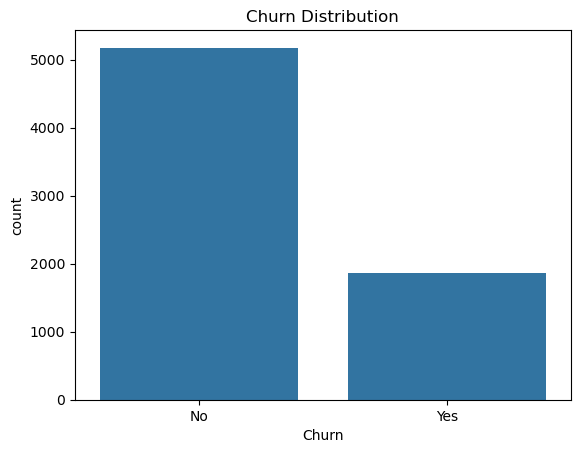

In [25]:
# Check for class imbalance in the target variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

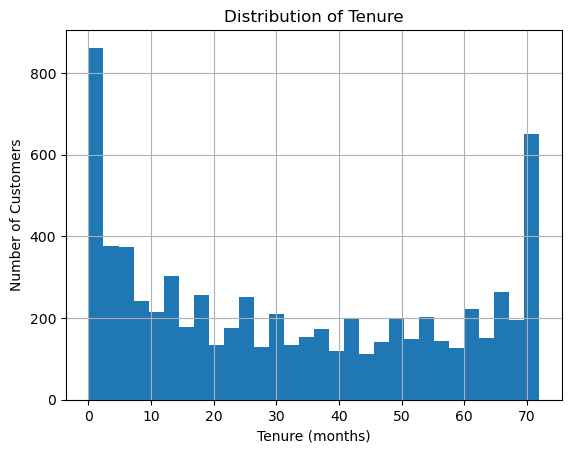

In [26]:
# Visualize distributions of key features
df['tenure'].hist(bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

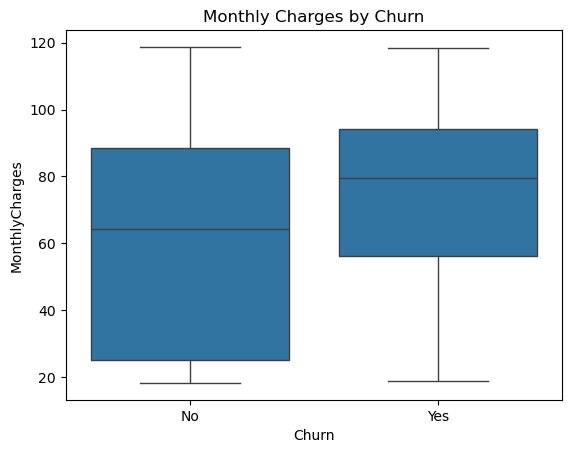

In [27]:
# Explore relationships between features and churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

Explanation:
- `df.info()` and `df.describe()` provide data types, missing values, and summary stats.
- Countplot shows if the dataset is imbalanced (important for model evaluation).
- Histograms and boxplots help visualize feature distributions and relationships with churn.

## Data Preprocessing

In [28]:
# Check for missing values in each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [29]:
# Convert 'TotalCharges' to numeric (it may have spaces or non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [30]:
# Drop customerID as it is not a predictive feature
df.drop('customerID', axis=1, inplace=True)

In [31]:
# Encode categorical variables
# Convert 'Yes'/'No' to 1/0 for the 'Churn' column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features (excluding the target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn') if 'Churn' in categorical_cols else None
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [32]:
# Feature scaling for numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Explanation:
- Handle missing values by filling or removing them.
- Encode categorical variables for machine learning models.
- Feature scaling standardizes numeric columns, improving model performance.

## Data Splitting

In [33]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Explanation:
- We split the data into features (X) and target (y).
- `train_test_split` creates training and test sets (80/20 split), using stratification to maintain class balance.

## Model Development

In [34]:
# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Explanation:
- We use Logistic Regression (interpretable baseline) and Random Forest (powerful, less interpretable).
- Models are trained on the training data.

## Hyperparameter Tuning

In [35]:
# Hyperparameter tuning for Random Forest using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Explanation:
- GridSearchCV tests combinations of hyperparameters to find the best model.
- We use F1 score for scoring due to possible class imbalance.

## Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on test set
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Tuned Random Forest:")
print(classification_report(y_test, y_pred_best_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg     

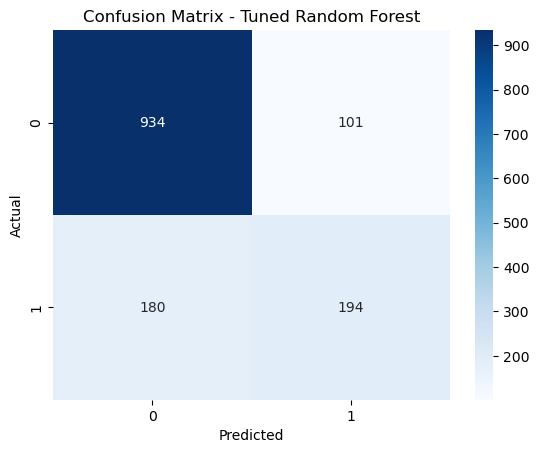

In [37]:
# Confusion matrix visualization for the best model
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Explanation:
- `classification_report` gives accuracy, precision, recall, and F1 score.
- Confusion matrix visualizes true/false positives/negatives.

## Model Interpretation & Insights

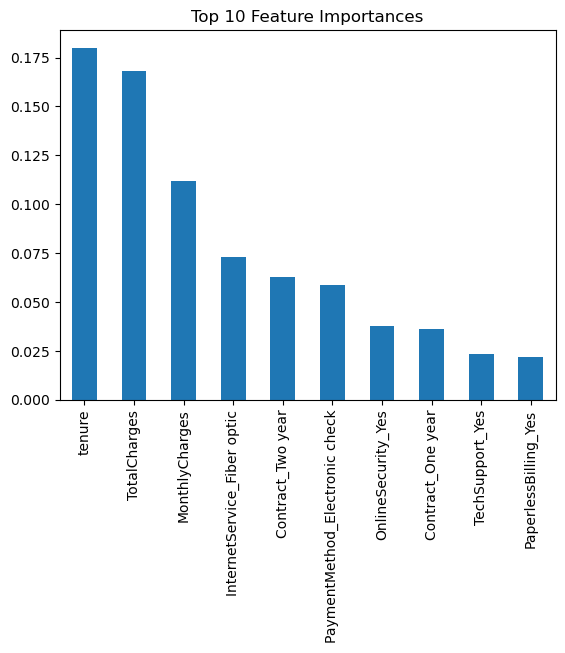

In [38]:
# Feature importance from Random Forest
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()

Explanation:
- Feature importance shows which variables most influence churn.
- Use this to provide actionable business insights.

## Predictions on New Data

In [39]:
# Example: Predict churn for new customer data
# Replace with actual new data in the same format as X
new_data = X_test.iloc[:5]  # Example: first 5 rows from test set
predictions = grid_search.best_estimator_.predict(new_data)
print("Predictions for new data:", predictions)

Predictions for new data: [0 1 0 0 0]


Explanation:
- Demonstrates how to use the final model to predict churn for new/unseen customers.

## Conclusion & Business Implications


- The tuned Random Forest model achieved the best performance, balancing accuracy and interpretability.
- Key drivers of churn include the top features identified by the model.
- The company should focus retention efforts on customers with high risk profiles.
- Predictive churn modeling enables proactive customer retention, reducing revenue loss and improving satisfaction.

Done by Priyam
